In [1]:
import pandas as pd
import yfinance as yf
import time
from datetime import datetime, timedelta, date
import math
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm
import plotly.io as pio
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
from OptionPricingMethods import black_scholes_price, binomial_tree_price, monte_carlo_price

### Real World Analysis

We want to see how these option pricing methods compare with the market prices options have recently been traded at. Using the yfinance library, we can find options that have been recently traded at different strike prices for different stocks (we will focus on the most popular stocks on the market due to limitations in the yfinance data available for less popular stocks).

### Items to Investigate

- Effect of Expiration Date on Option Pricing
- Effect of Strike Price on Option Pricing
- **Runtime of each Option Pricing Calculation**


In [ ]:
start = time.start()

end = time.end()

### Effect of N on the Binomial Tree Runtime

In [9]:
n_dict = {}
for n in range(1, 1000, 10):

    start = time.time()
    bt_price = binomial_tree_price(100, 100, 0.07, 1, 0.2, n)
    end = time.time()
    
    n_dict[n] = end-start

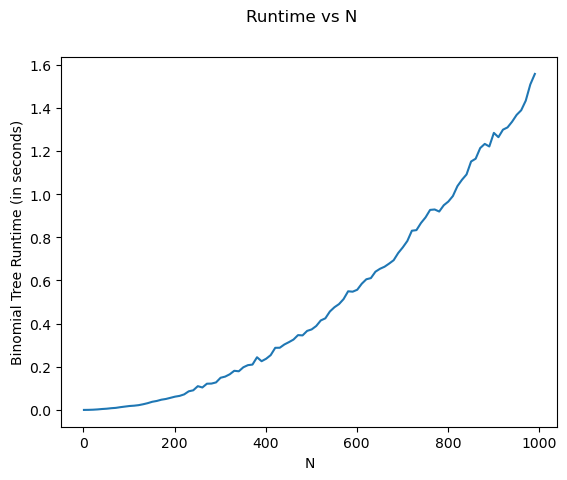

In [10]:
plt.figure()
plt.plot(n_dict.keys(), n_dict.values())
plt.xlabel('N')
plt.ylabel('Binomial Tree Runtime (in seconds)')
plt.suptitle('Runtime vs N')
plt.show()

### Binomial Tree Runtime Reflection

As we can see from the graph above, as we increase the number of steps in the binomial tree, the runtime of the option pricing calculation will increase quadratically.

### Effect of n_sim on the Monte Carlo Runtime

In [23]:
n_sim_dict = {}
for n_sim in range(1, 1000000, 100):

    start = time.time()
    mc = monte_carlo_price(100, 100, 0.07, 1, 0.2, n_sim)
    end = time.time()
    
    n_sim_dict[n_sim] = end-start


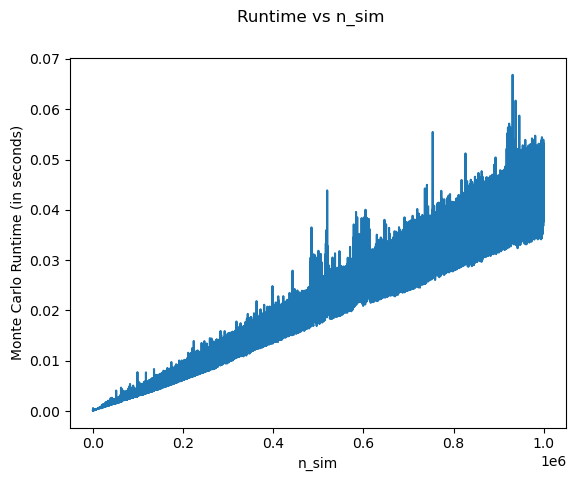

In [24]:
plt.figure()
plt.plot(n_sim_dict.keys(), n_sim_dict.values())
plt.xlabel('n_sim')
plt.ylabel('Monte Carlo Runtime (in seconds)')
plt.suptitle('Runtime vs n_sim')
plt.show()

### Monte Carlo Runtime Reflection

As we can see from the graph above, as we increase the number of simulations in the monte carlo model, the runtime of the option pricing calculation will increase linearly.